In [132]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import KFold

In [133]:
# Chargement et visualisation du dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv("Bloc3-Ex2-uber.csv")
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,12/16/2018 9:30,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,11/27/2018 2:00,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,11/28/2018 1:00,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,11/30/2018 4:53,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,11/29/2018 3:49,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [134]:
# Afficher le nombre de lignes et colonnes du dataframe
df.shape

(9345, 57)

In [135]:
# Identifier les valeurs manquantes et explorer le type des données du dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345 entries, 0 to 9344
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           9345 non-null   object 
 1   timestamp                    9345 non-null   float64
 2   hour                         9345 non-null   int64  
 3   day                          9345 non-null   int64  
 4   month                        9345 non-null   int64  
 5   datetime                     9345 non-null   object 
 6   timezone                     9345 non-null   object 
 7   source                       9345 non-null   object 
 8   destination                  9345 non-null   object 
 9   cab_type                     9345 non-null   object 
 10  product_id                   9345 non-null   object 
 11  name                         9345 non-null   object 
 12  price                        8627 non-null   float64
 13  distance          

In [136]:
# Sélectionner les colonnes numériques pertinentes pour le clustering
df_num = df.select_dtypes(include=['int64', 'float64'])
col = ['hour', 'distance', 'price', 'latitude', 'longitude', 'temperature', 'humidity', 'windSpeed']
df_num_col = df_num[col]

# Convertir toutes ces colonnes en float64
df_num_col = df_num_col.astype('float64')

# Vérifier que la conversion a bien eu lieu
print(df_num_col.dtypes)

# Vérifier le résultat
print(df_num_col.head())


hour           float64
distance       float64
price          float64
latitude       float64
longitude      float64
temperature    float64
humidity       float64
windSpeed      float64
dtype: object
   hour  distance  price  latitude  longitude  temperature  humidity  \
0   9.0      0.44    5.0   42.2148    -71.033        42.34      0.68   
1   2.0      0.44   11.0   42.2148    -71.033        43.58      0.94   
2   1.0      0.44    7.0   42.2148    -71.033        38.33      0.75   
3   4.0      0.44   26.0   42.2148    -71.033        34.38      0.73   
4   3.0      0.44    9.0   42.2148    -71.033        37.44      0.70   

   windSpeed  
0       8.66  
1      11.98  
2       7.33  
3       5.28  
4       9.14  


In [137]:
# Remplir les valeurs manquantes de la colonne price par la moyenne de la colonne price

# Initialiser l'imputer avec la stratégie "mean"
imputer = SimpleImputer(strategy="mean")

# Appliquer l'imputation sur la colonne 'price' et conserver le résultat dans le DataFrame
df_num_col[['price']] = imputer.fit_transform(df_num_col[['price']])

# Vérifier si les valeurs manquantes ont été remplies
print(df_num_col['price'].isnull().sum())  # Doit afficher 0
df_num_col.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345 entries, 0 to 9344
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         9345 non-null   float64
 1   distance     9345 non-null   float64
 2   price        9345 non-null   float64
 3   latitude     9345 non-null   float64
 4   longitude    9345 non-null   float64
 5   temperature  9345 non-null   float64
 6   humidity     9345 non-null   float64
 7   windSpeed    9345 non-null   float64
dtypes: float64(8)
memory usage: 584.2 KB


In [138]:
# Calculer la skewness de chaque colonne, la trier et l'interpréter
skewness = df_num_col.skew().sort_values(ascending=True)

# Fonction d'interprétation de la skewness
def interpret_skewness(value):
    if abs(value) < 0.5:
        return "Distribution symétrique (proche de la normale)"
    elif 0.5 <= value < 1 or -1 < value <= -0.5:
        return "Légère asymétrie"
    else:
        return "Distribution fortement asymétrique"

# Créer un DataFrame pour afficher proprement
df_skewness = pd.DataFrame({
    'Skewness': skewness,
    'Interprétation': skewness.apply(interpret_skewness)
})

# Afficher le résultat
print(df_skewness)

             Skewness                                  Interprétation
latitude    -2.101363              Distribution fortement asymétrique
temperature -0.610445                                Légère asymétrie
longitude   -0.353285  Distribution symétrique (proche de la normale)
humidity    -0.053502  Distribution symétrique (proche de la normale)
hour        -0.029165  Distribution symétrique (proche de la normale)
windSpeed    0.421997  Distribution symétrique (proche de la normale)
distance     1.014660              Distribution fortement asymétrique
price        1.016777              Distribution fortement asymétrique


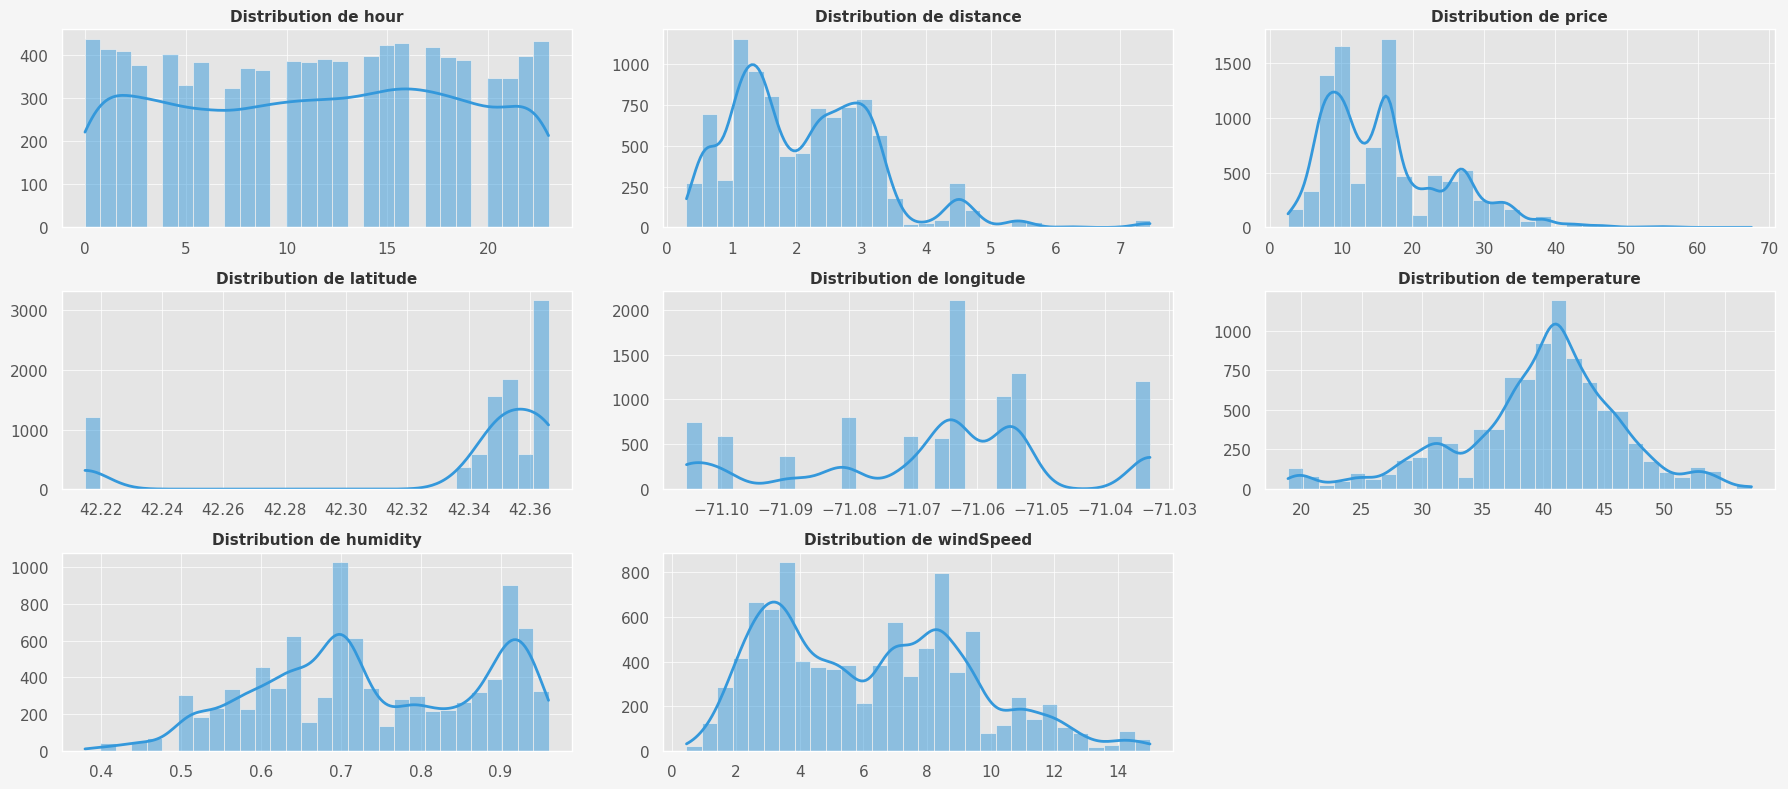

In [139]:
# Appliquer un style avec un fond gris
plt.style.use("ggplot")

# Définition de la figure
fig = plt.figure(figsize=(18, 8))
fig.patch.set_facecolor('#f5f5f5')  # Fond gris clair

# Boucle pour afficher chaque histogramme
for i, column in enumerate(df_num_col.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_num_col[column], kde=True, bins=30, color="#3498db")  # Bleu élégant
    plt.title(f"Distribution de {column}", fontsize=11, fontweight='bold', color='#333333')  # Titre en gris foncé
    plt.xlabel("")  # Supprimer le label X pour alléger l'affichage
    plt.ylabel("")

# Ajustement final
plt.tight_layout()
plt.show()

In [140]:
# Vérifier la corrélation entre les colonnes numériques (utile pour PCA)
# Compute the correlation matrix
corr = df_num_col.corr()
print(corr)

                 hour  distance     price  latitude  longitude  temperature  \
hour         1.000000  0.014217 -0.000791  0.018601   0.008881     0.224628   
distance     0.014217  1.000000  0.323362  0.018652  -0.031906    -0.004917   
price       -0.000791  0.323362  1.000000  0.023805  -0.020440     0.015508   
latitude     0.018601  0.018652  0.023805  1.000000  -0.533648    -0.112126   
longitude    0.008881 -0.031906 -0.020440 -0.533648   1.000000     0.017056   
temperature  0.224628 -0.004917  0.015508 -0.112126   0.017056     1.000000   
humidity    -0.259605 -0.004429  0.003543 -0.140911   0.109366     0.311848   
windSpeed    0.072887  0.002929  0.008158 -0.101943   0.092867     0.083456   

             humidity  windSpeed  
hour        -0.259605   0.072887  
distance    -0.004429   0.002929  
price        0.003543   0.008158  
latitude    -0.140911  -0.101943  
longitude    0.109366   0.092867  
temperature  0.311848   0.083456  
humidity     1.000000  -0.191920  
windSpee

<Axes: >

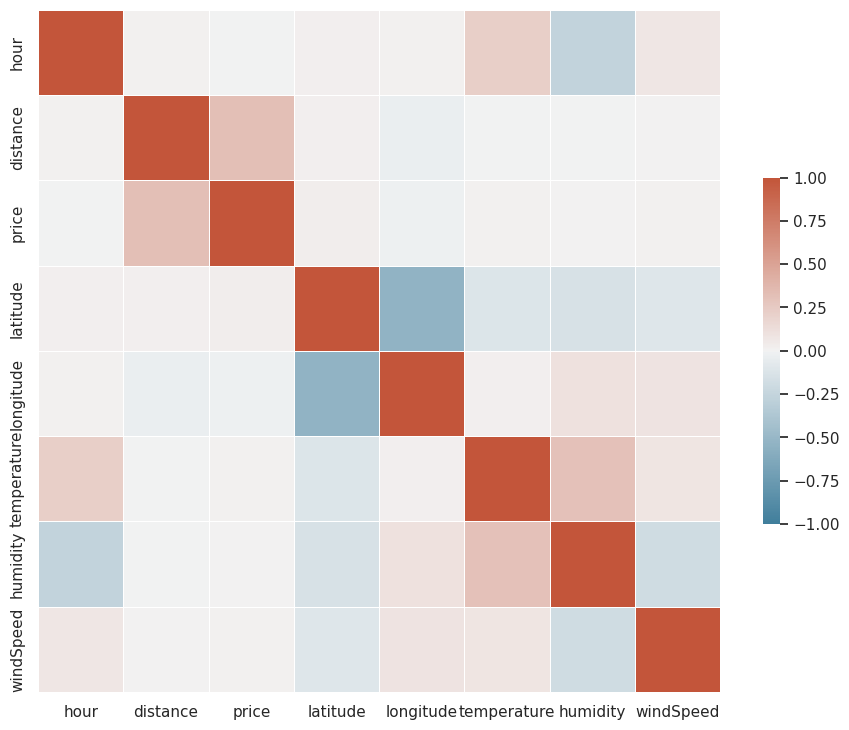

In [141]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#/!\ To get the correct diagonal values(=1) delete the mask from sns.heatmap
# Draw the heatmap with the mask and correct aspect ratio
# mask=mask,
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [142]:
# Normaisation des colonnes numériques choisies avec StandardScaler()
features = df_num_col[col]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [143]:
pca = PCA(n_components=8, svd_solver='auto')
pca.fit(features_scaled)

PCA(n_components=8)

In [144]:
reduced_matrix = pca.fit_transform(features_scaled)

In [146]:
reduced_matrix.shape

(9345, 8)

In [147]:
type(reduced_matrix)

numpy.ndarray

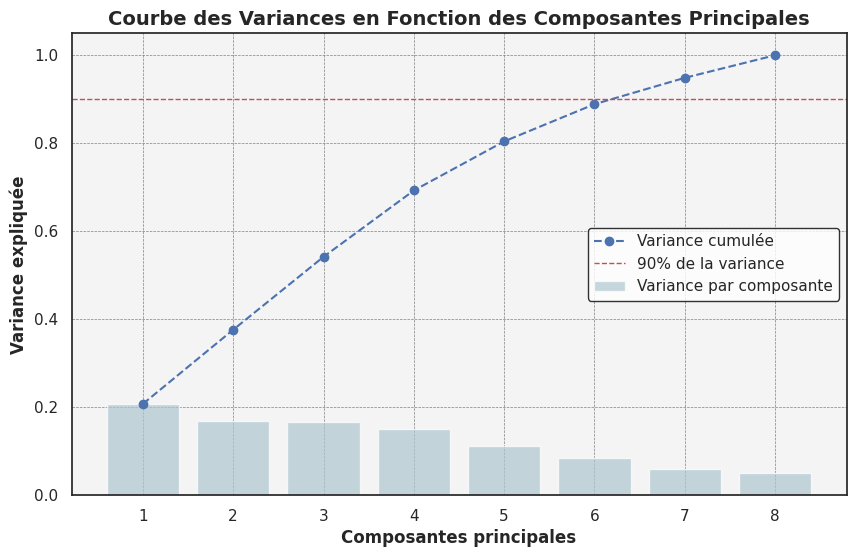

In [148]:
# Variance expliquée par composante
explained_variance_ratio = pca.explained_variance_ratio_

# Création de la figure avec fond blanc (bordure)
plt.figure(figsize=(10, 6))

# Ajout de la courbe de variance cumulée
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio),
         marker='o', linestyle='--', color='b', label='Variance cumulée')

# Ajout du barplot pour la variance par composante (barres bleu ciel pastel)
plt.bar(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
        alpha=0.7, color='#AEC6CF', label='Variance par composante')  # Bleu ciel pastel

# Axe X avec des valeurs de 1 en 1
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1, 1))

# Ligne horizontale pour les 90% de variance expliquée
plt.axhline(y=0.9, color='r', linestyle='--', linewidth=1, label='90% de la variance')

# Labels et titre
plt.xlabel('Composantes principales', fontsize=12, fontweight='bold')
plt.ylabel('Variance expliquée', fontsize=12, fontweight='bold')
plt.title('Courbe des Variances en Fonction des Composantes Principales', fontsize=14, fontweight='bold')

# Activation du fond gris pour la grille (en arrière-plan)
plt.gca().set_facecolor('#f4f4f4')  # Fond gris derrière la courbe

# Ajout d'un quadrillage visible en pointillés gris clair
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)  # Pointillés gris clair

# Ajout d'une légende stylisée
plt.legend(frameon=True, facecolor='white', edgecolor='black')

# Affichage du graphique
plt.show()

In [149]:
pca.components_

array([[ 0.04078334,  0.0883877 ,  0.07459247,  0.63372666, -0.60020111,
        -0.2902538 , -0.35615285, -0.10962358],
       [-0.55273083,  0.00359217,  0.01754255,  0.13111663, -0.16580889,
         0.0112398 ,  0.60772388, -0.52917783],
       [ 0.09783859,  0.68029868,  0.68593095, -0.02601415, -0.00606658,
         0.20908377,  0.10365909,  0.04410519],
       [ 0.45838961, -0.16858181, -0.15398864,  0.20960796, -0.29527601,
         0.73394553,  0.259235  , -0.02728349],
       [-0.50076285, -0.05646403,  0.00913344,  0.12530624, -0.21830533,
         0.15486337,  0.14969995,  0.79762983],
       [ 0.00899075, -0.70434133,  0.7062949 ,  0.02462644,  0.03899825,
         0.00090897, -0.0365378 , -0.0388175 ],
       [ 0.23558421,  0.01268037, -0.01347667,  0.64069403,  0.54945512,
        -0.23726078,  0.38143144,  0.1731626 ],
       [ 0.40839654, -0.03876718,  0.02822969, -0.33134538, -0.4170879 ,
        -0.50294947,  0.50660025,  0.19379991]])

In [150]:
# Créer un DataFrame pour les poids de chaque variable
loadings = pd.DataFrame(pca.components_, columns=col)
print(loadings)

       hour  distance     price  latitude  longitude  temperature  humidity  \
0  0.040783  0.088388  0.074592  0.633727  -0.600201    -0.290254 -0.356153   
1 -0.552731  0.003592  0.017543  0.131117  -0.165809     0.011240  0.607724   
2  0.097839  0.680299  0.685931 -0.026014  -0.006067     0.209084  0.103659   
3  0.458390 -0.168582 -0.153989  0.209608  -0.295276     0.733946  0.259235   
4 -0.500763 -0.056464  0.009133  0.125306  -0.218305     0.154863  0.149700   
5  0.008991 -0.704341  0.706295  0.024626   0.038998     0.000909 -0.036538   
6  0.235584  0.012680 -0.013477  0.640694   0.549455    -0.237261  0.381431   
7  0.408397 -0.038767  0.028230 -0.331345  -0.417088    -0.502949  0.506600   

   windSpeed  
0  -0.109624  
1  -0.529178  
2   0.044105  
3  -0.027283  
4   0.797630  
5  -0.038818  
6   0.173163  
7   0.193800  


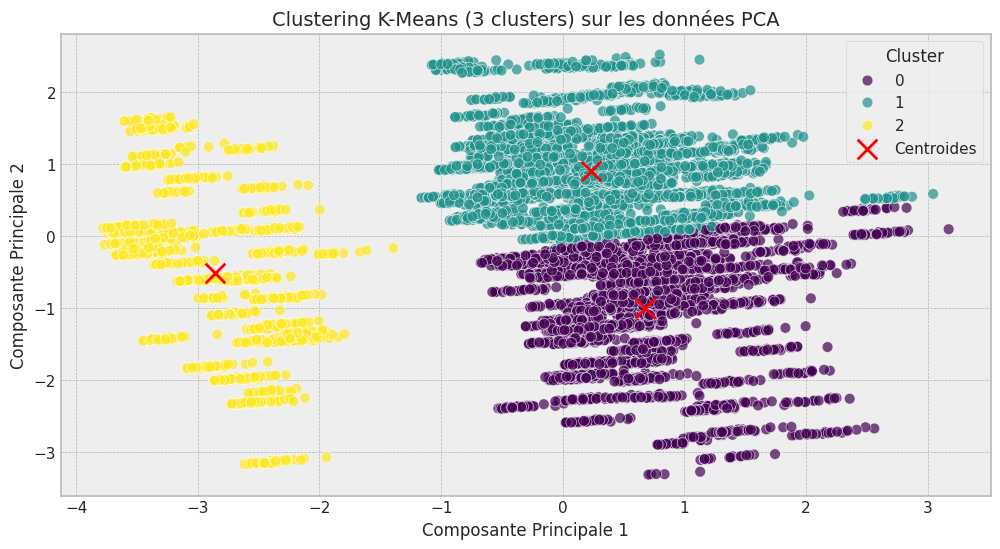

Centres des clusters :
[[ 0.67662453 -1.0011996 ]
 [ 0.22877412  0.90405266]
 [-2.86001196 -0.50238023]]


'# Choisir le nombre optimal de clusters (3 à 4 comme suggéré)\n# Utilisation de la méthode du coude pour déterminer le K optimal\ninertia = []\nfor k in range(1, 11):\n    kmeans = KMeans(n_clusters=k, random_state=42)\n    kmeans.fit(reduced_matrix)\n    inertia.append(kmeans.inertia_)\n\n# Affichage de la méthode du coude\nplt.plot(range(1, 11), inertia, marker="o")\nplt.title("Méthode du coude pour K-Means")\nplt.xlabel("Nombre de clusters")\nplt.ylabel("Inertie")\nplt.show()\n\n# Appliquer K-Means avec k=3 (par exemple)\nkmeans = KMeans(n_clusters=3, random_state=42)\nclusters = kmeans.fit_predict(reduced_matrix)\n\n# Ajouter les clusters au DataFrame\ndf["Cluster"] = clusters\n\n# Visualisation des clusters\nplt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap="viridis", alpha=0.5)\nplt.title("Clusters obtenus après PCA et K-Means")\nplt.xlabel("Composante principale 1")\nplt.ylabel("Composante principale 2")\nplt.colorbar()\nplt.show()\n'

In [151]:
# Application de K-means pour le clustering

# Appliquer un fond gris
plt.style.use('bmh')

# Retenir uniquement les 2 premières composantes principales pour la visualisation
pca_features_2 = reduced_matrix[:, :2]  # Assure-toi que "reduced_matrix" contient bien les données PCA

# Appliquer KMeans avec 3 clusters sur les 2 premières composantes
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_features_2)

# Récupérer les labels des clusters
labels = kmeans.labels_

# Créer un DataFrame avec les 2 premières composantes principales et les labels de clusters
df_pca = pd.DataFrame(pca_features_2, columns=[f'PC{i+1}' for i in range(2)])
df_pca['Cluster'] = labels

# Visualisation des clusters avec les 2 premières composantes principales
plt.figure(figsize=(12, 6))

# Tracer les points des clusters avec des points plus petits (s=60)
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='viridis', s=60, alpha=0.7, edgecolor='w', linewidth=0.5)

# Tracer les centroids sous forme de croix rouge
centroids = kmeans.cluster_centers_  # Récupérer les centres des clusters
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroides', linewidth=2)

# Ajouter un titre et labels
plt.title("Clustering K-Means (3 clusters) sur les données PCA", fontsize=14)
plt.xlabel("Composante Principale 1", fontsize=12)
plt.ylabel("Composante Principale 2", fontsize=12)

# Ajouter une légende
plt.legend(title="Cluster")
plt.grid(True)

# Afficher le graphique
plt.show()

# Afficher les centres des clusters
print("Centres des clusters :")
print(kmeans.cluster_centers_)




"""# Retenir uniquement les 2 premières composantes principales pour la visualisation
pca_features_6 = reduced_matrix[:, :2]  # Assure-toi que "reduced_matrix" contient bien les données PCA

# Appliquer KMeans avec 3 clusters sur les 2 premières composantes
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_features_6)

# Récupérer les labels des clusters
labels = kmeans.labels_

# Créer un DataFrame avec les 2 premières composantes principales et les labels de clusters
df_pca = pd.DataFrame(pca_features_6, columns=[f'PC{i+1}' for i in range(2)])
df_pca['Cluster'] = labels

# Visualisation des clusters avec les 2 premières composantes principales
plt.figure(figsize=(8, 6))

# Tracer les points des clusters
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='viridis', s=100, alpha=0.7, edgecolor='w', linewidth=0.5)

# Tracer les centroids sous forme de croix rouge
centroids = kmeans.cluster_centers_  # Récupérer les centres des clusters
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroides', linewidth=2)

# Ajouter un titre et labels
plt.title("Clustering K-Means (3 clusters) sur les données PCA", fontsize=14)
plt.xlabel("Composante Principale 1", fontsize=12)
plt.ylabel("Composante Principale 2", fontsize=12)

# Ajouter une légende
plt.legend(title="Cluster")
plt.grid(True)

# Afficher le graphique
plt.show()

# Afficher les centres des clusters
print("Centres des clusters :")
print(kmeans.cluster_centers_)"""




"""# Retenir uniquement les 6 premiers composants qui expliquent 90% de la variance
pca_features_6 = reduced_matrix[:, :2]

# Appliquer KMeans avec 3 clusters sur les 6 premières composantes
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_features_6)

# Récupérer les labels des clusters
labels = kmeans.labels_

# Créer un DataFrame avec les composantes principales et les labels de clusters
df_pca = pd.DataFrame(pca_features_6, columns=[f'PC{i+1}' for i in range(2)])
df_pca['Cluster'] = labels

# Visualisation des clusters avec les 2 premières composantes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='viridis', s=100, alpha=0.7, edgecolor='w', linewidth=0.5)
plt.title("Clustering K-Means (3 clusters) sur les données PCA", fontsize=14)
plt.xlabel("Composante Principale 1", fontsize=12)
plt.ylabel("Composante Principale 2", fontsize=12)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Afficher les centres des clusters pour comprendre la position de chaque groupe dans l'espace PCA
print("Centres des clusters :")
print(kmeans.cluster_centers_)"""


"""# Choisir le nombre optimal de clusters (3 à 4 comme suggéré)
# Utilisation de la méthode du coude pour déterminer le K optimal
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_matrix)
    inertia.append(kmeans.inertia_)

# Affichage de la méthode du coude
plt.plot(range(1, 11), inertia, marker="o")
plt.title("Méthode du coude pour K-Means")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()

# Appliquer K-Means avec k=3 (par exemple)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_matrix)

# Ajouter les clusters au DataFrame
df["Cluster"] = clusters

# Visualisation des clusters
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap="viridis", alpha=0.5)
plt.title("Clusters obtenus après PCA et K-Means")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar()
plt.show()
"""

In [152]:
# Calculer le Silhouette Score pour évaluer la qualité des clusters sur les 2 premières composantes principales
sil_score = silhouette_score(pca_features_2, labels)

# Afficher le Silhouette Score
print(f"Silhouette Score : {sil_score:.2f}")

Silhouette Score : 0.47


In [153]:
# K-Fold Cross-Validation pour évaluer la stabilité des clusters

# Nombre de folds pour la validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Liste pour stocker les indices des clusters pour chaque fold
clusters_list = []

# K-Fold Cross Validation
for train_idx, test_idx in kf.split(pca_features_2):  # Utilise les mêmes données que pour PCA
    X_train, X_test = pca_features_2[train_idx], pca_features_2[test_idx]

    # Appliquer KMeans sur l'ensemble d'entraînement
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_train)

    # Assigner les clusters aux données de test
    clusters = kmeans.predict(X_test)

    # Ajouter les clusters obtenus pour chaque fold
    clusters_list.append(clusters)

# Calculer la consistance des clusters entre les folds
# Utiliser la distance de Rand ou une autre méthode pour comparer la stabilité des clusters entre les folds

# Comparaison des clusters entre les différents folds
rand_scores = []

for i in range(1, len(clusters_list)):
    score = adjusted_rand_score(clusters_list[0], clusters_list[i])  # Compare le premier fold avec les autres
    rand_scores.append(score)

# Moyenne des scores Rand pour observer la stabilité des clusters
print(f"Stabilité des clusters (score ARI moyen) : {np.mean(rand_scores):.2f}")



Stabilité des clusters (score ARI moyen) : -0.00


In [154]:
# Appliquer KMeans avec différentes initialisations et calculer la variance
n_init_values = 10  # Le nombre d'initialisations
inertia_values = []

for i in range(n_init_values):
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=i)  # Random_state pour des initialisations différentes
    kmeans.fit(pca_features_2)
    inertia_values.append(kmeans.inertia_)

# Afficher la variance de l'inertie des clusters
print(f"Variance de l'inertie sur {n_init_values} initialisations : {np.var(inertia_values):.4f}")

Variance de l'inertie sur 10 initialisations : 0.0002


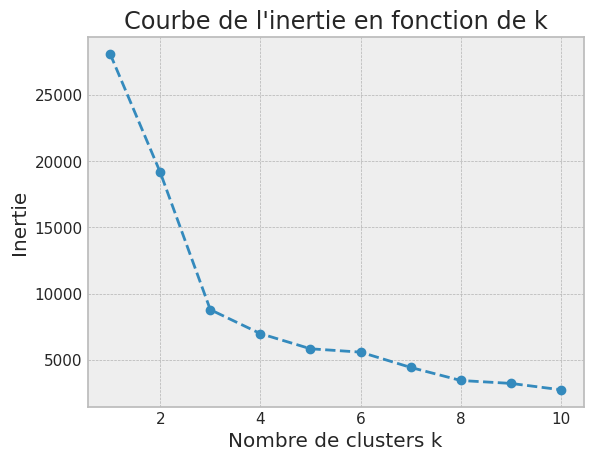

In [155]:
#Courbe de l'inertie en fonction de K
inertia_values = []
for k in range(1, 11):  # Tester différentes valeurs de k
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features_2)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.title('Évolution de l\'inertie en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Inertie')
plt.title("Courbe de l'inertie en fonction de k")
plt.show()

In [156]:
# Ajouter les labels de clusters dans le DataFrame original (df)
df_num_col['Cluster'] = labels

# Calculer les moyennes des caractéristiques pour chaque cluster
cluster_summary = df_num_col.groupby("Cluster")[col].mean()

# Afficher les moyennes
print(cluster_summary)

              hour  distance      price   latitude  longitude  temperature  \
Cluster                                                                      
0        16.964356  2.153248  16.371438  42.356465 -71.070986    39.255208   
1         7.401825  2.121907  16.400472  42.356091 -71.071256    39.345371   
2        11.270315  2.063914  15.767581  42.214800 -71.033000    41.515265   

         humidity  windSpeed  
Cluster                       
0        0.629949   7.320648  
1        0.810321   5.177111  
2        0.792305   7.117852  
